In [228]:
import geopandas as gpd
import pandas as pd
import folium
from datetime import datetime

In [229]:
gdf = gpd.read_file("../data/data_all_gpd_v2.shp")
gdf.head()

,started_at,ended_at,duration,st_st_id,st_st_name,st_st_desc,st_st_lat,st_st_lon,en_st_id,en_st_name,en_st_desc,en_st_lat,en_st_lon,minutes,id,total_dist,waytypes_d,waytypes_s,geometry
0,2022-07-02 08:39:02.618000+00:00,2022-07-02 08:47:54.958000+00:00,532,408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977,448,Oslo Plaza,ved rundkjøringen,59.912183,10.754434,8,6044,1502.2,0 3 7;3 13 2;13 20 3;20 50 2;50 82 3;82 91 7;,v:3.0 d:805.9 a:53.65;v:2.0 d:638.3 a:42.49;v:...,"LINESTRING (10.77395 59.91491, 10.77397 59.914..."
1,2022-07-02 08:39:04.505000+00:00,2022-07-02 08:48:36.381000+00:00,571,397,Storo Storsenter,langs Vitaminveien,59.946710,10.773805,421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203,9,6045,2701.3,0 2 7;2 86 2;86 94 7;94 111 6;111 112 7;112 11...,v:2.0 d:1435.3 a:53.14;v:3.0 d:805.4 a:29.82;v...,"LINESTRING (10.77378 59.94668, 10.77369 59.946..."
2,2022-07-02 08:39:22.379000+00:00,2022-07-02 08:55:10.095000+00:00,947,601,Rolf Wickstrøms vei,ved Bergrådveien,59.953411,10.757724,2309,Ulven Torg,"innenfor byggegjerdene, sør for Ulvenveien",59.924721,10.810727,15,6047,5583.8,0 4 7;4 83 6;83 93 7;93 141 6;141 142 7;142 16...,v:6.0 d:2775.3 a:49.7;v:3.0 d:1226.1 a:21.96;v...,"LINESTRING (10.75776 59.95342, 10.75783 59.953..."
3,2022-07-02 08:40:20.905000+00:00,2022-07-02 09:03:56.044000+00:00,1415,464,Sukkerbiten,ved gangbroen,59.905124,10.753764,561,Kirkeveien,ved Gørbitz' gate,59.933480,10.726294,23,6052,4430.6,0 3 7;3 7 4;7 8 7;8 18 2;18 42 1;42 139 2;139 ...,v:2.0 d:2641.3 a:59.61;v:3.0 d:841.5 a:18.99;v...,"LINESTRING (10.75380 59.90512, 10.75386 59.905..."
4,2022-07-02 08:40:45.470000+00:00,2022-07-02 08:50:08.635000+00:00,563,519,Thomas Heftyes plass,ved Bygdøy allé,59.918578,10.703900,473,Majorstuveien,langs Maries gate,59.926697,10.716195,9,6053,1409.8,0 3 7;3 30 2;30 54 1;54 64 3;,v:1.0 d:657.1 a:46.61;v:2.0 d:427.4 a:30.32;v:...,"LINESTRING (10.70389 59.91857, 10.70347 59.918..."


In [230]:
len(gdf)

25632

In [231]:
def format_waytypes_summary(waytypes_summary):
    output_list = []
    data = waytypes_summary.split(";")
    data = list(filter(None, data))
    for sequence in data:
        datapoints = sequence.split(" ")
        output_list.append(
            {
                "value": datapoints[0].split(":")[1],
                "distance": datapoints[1].split(":")[1],
                "amount": datapoints[2].split(":")[1]
            }
        )
    return output_list

In [232]:
all_road = []
types = []

for i in range(len(gdf)):
    sample_route = gdf.iloc[i]
    waytypes_data = sample_route["waytypes_d"]
    waytypes_summary = sample_route["waytypes_s"]
    waytypes_summary_formatted = format_waytypes_summary(waytypes_summary)
    all_road.append(waytypes_summary_formatted)


In [233]:
value_map = {'0.0': 'Unkown', '1.0': 'State road', '2.0': 'Road', '3.0': 'Street','4.0': 'Path', '5.0': 'Track', '6.0': 'Bike', '7.0': 'Footway', '8.0': 'Steps', '9.0': 'Ferry', '10.0': 'Construction'}

In [234]:
for lst in all_road:
    for d in lst:
        value = d['value']
        if value in value_map:
            d['value'] = value_map[value]

In [235]:
distances_by_value = {}

for lst in all_road:
    for d in lst:
        value = d['value']
        distance = float(d['distance'])
        if value not in distances_by_value:
            distances_by_value[value] = distance
        else:
            distances_by_value[value] += distance

print(distances_by_value)

{'Street': 12583110.199999882, 'Road': 27800030.300000034, 'Footway': 4083214.2000000277, 'Bike': 7190996.200000013, 'State road': 8276608.099999949, 'Path': 100887.59999999982, 'Steps': 6083.599999999998, 'Unkown': 7769.999999999996}


# Proportion of bike lanes

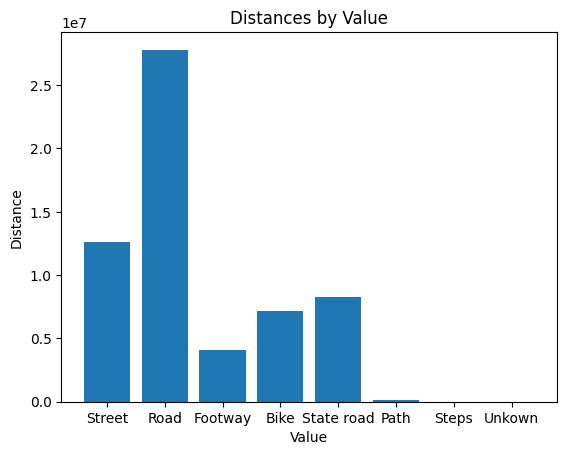

In [236]:
import matplotlib.pyplot as plt
plt.bar(distances_by_value.keys(), distances_by_value.values())
plt.xlabel('Value')
plt.ylabel('Distance')
plt.title('Distances by Value')
plt.show()

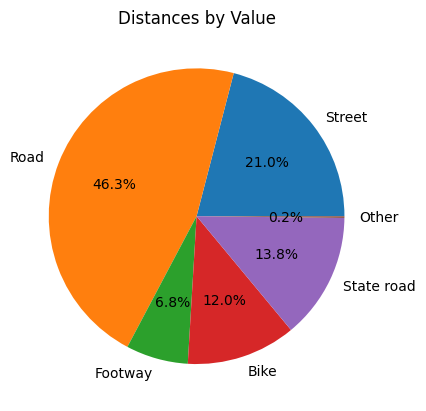

In [352]:
threshold = 0.05 
total = sum(distances_by_value.values())
small_values = {k: v for k, v in distances_by_value.items() if v/total < threshold}
large_values = {k: v for k, v in distances_by_value.items() if v/total >= threshold}

other_value = sum(small_values.values())
large_values['Other'] = other_value

labels = [f'{v}' for v in large_values.keys()]
sizes = list(large_values.values())
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distances by Value')
plt.show()

In [353]:
amounts_by_value = {}

for lst in all_road:
    for d in lst:
        value = d['value']
        amount = float(d['amount'])
        if value not in amounts_by_value:
            amounts_by_value[value] = amount
        else:
            amounts_by_value[value] += amount

print(amounts_by_value) 

{'Street': 569521.8599999966, 'Road': 1223108.3000000045, 'Footway': 207467.75000000055, 'Bike': 244624.32000000073, 'State road': 312820.6400000024, 'Path': 4834.5400000000045, 'Steps': 383.4099999999997, 'Unkown': 438.23000000000076}


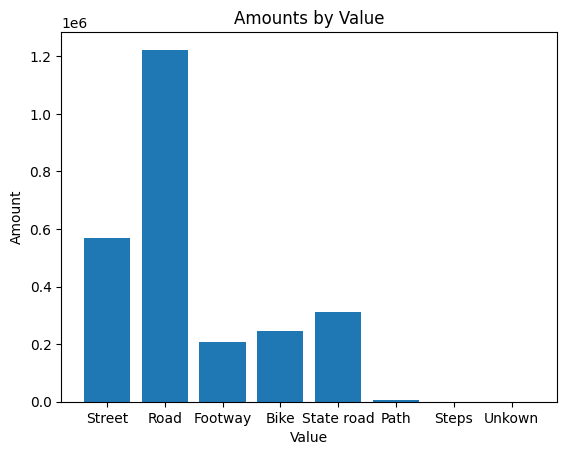

In [354]:
import matplotlib.pyplot as plt
plt.bar(amounts_by_value.keys(), amounts_by_value.values())
plt.xlabel('Value')
plt.ylabel('Amount')
plt.title('Amounts by Value')
plt.show()

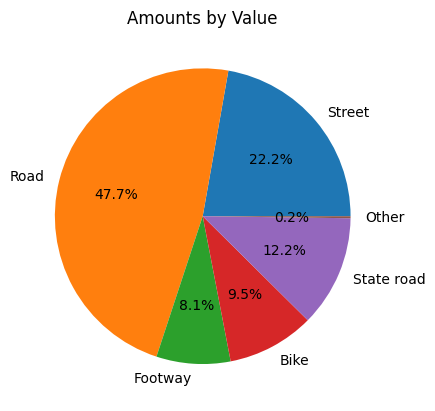

In [355]:
threshold = 0.05
total = sum(amounts_by_value.values())
small_values = {k: v for k, v in amounts_by_value.items() if v/total < threshold}
large_values = {k: v for k, v in amounts_by_value.items() if v/total >= threshold}

other_value = sum(small_values.values())
large_values['Other'] = other_value

labels = [f'{v}' for v in large_values.keys()]
sizes = list(large_values.values())
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Amounts by Value')
plt.show()


In [356]:
nbr_of_bike_lanes = 0
nbr_of_any_type_of_roads = 0 

for lst in all_road:
    for d in lst:
        nbr_of_any_type_of_roads += 1
        value = d['value']
        amount = float(d['amount'])
        if value == 'Bike':
            nbr_of_bike_lanes += 1

In [357]:
nbr_of_bike_lanes/nbr_of_any_type_of_roads

0.15340859025445716

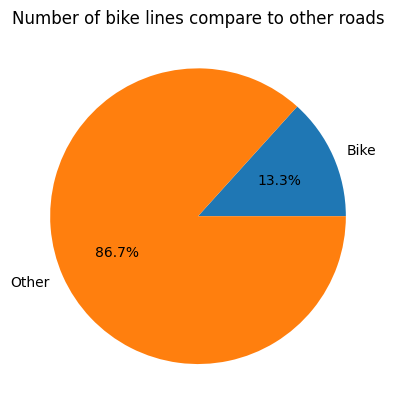

In [358]:
values = [nbr_of_bike_lanes, nbr_of_any_type_of_roads]
labels = ['Bike', 'Other']
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Number of bike lines compare to other roads')
plt.show()

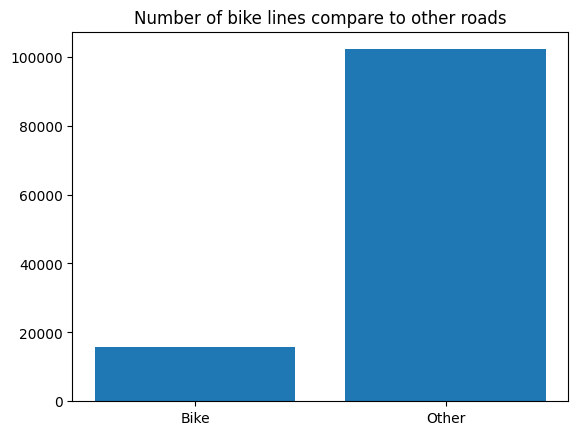

In [359]:
plt.bar(labels, values)
plt.title('Number of bike lines compare to other roads')
plt.show()

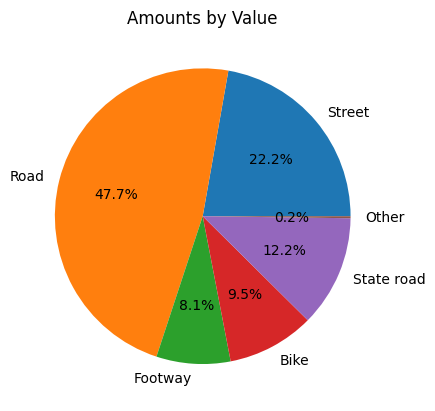

In [360]:
threshold = 0.05
total = sum(amounts_by_value.values())
small_values = {k: v for k, v in amounts_by_value.items() if v/total < threshold}
large_values = {k: v for k, v in amounts_by_value.items() if v/total >= threshold}

other_value = sum(small_values.values())
large_values['Other'] = other_value

labels = [f'{v}' for v in large_values.keys()]
sizes = list(large_values.values())
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Amounts by Value')
plt.show()


In [361]:
gdf.minutes

0         8
1         9
2        15
3        23
4         9
         ..
25627    15
25628     8
25629    10
25630     8
25631     9
Name: minutes, Length: 25632, dtype: int64

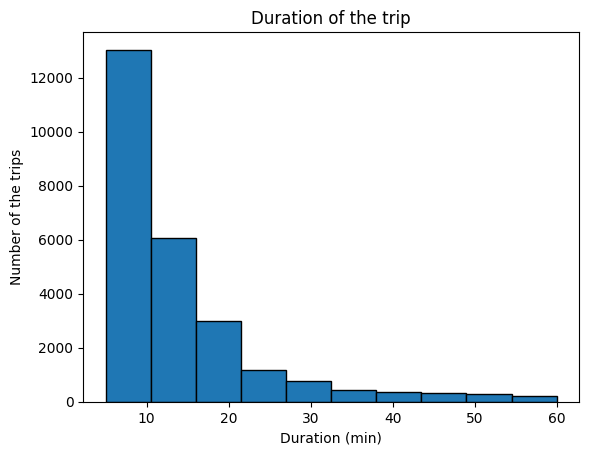

In [362]:
plt.hist(gdf.minutes, bins=10, edgecolor='black')

plt.xlabel('Duration (min)')
plt.ylabel('Number of the trips')
plt.title('Duration of the trip')

plt.show()

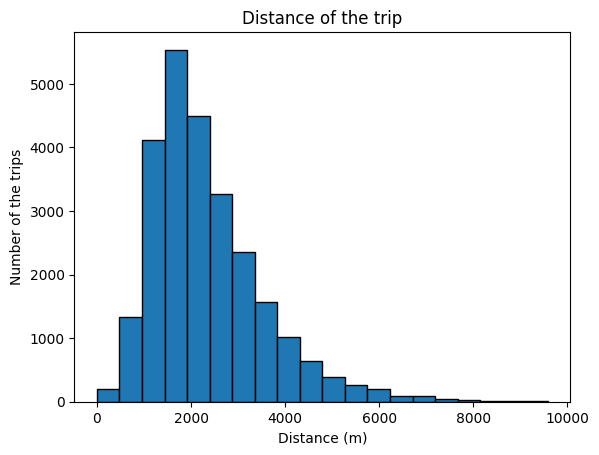

In [363]:
plt.hist(gdf.total_dist, bins=20, edgecolor='black')

plt.xlabel('Distance (m)')
plt.ylabel('Number of the trips')
plt.title('Distance of the trip')

plt.show()

In [364]:
gdf['km'] = gdf['total_dist']/1000
gdf['hour'] = gdf['minutes']/60
gdf['average speed'] = gdf['km'] / gdf['hour']

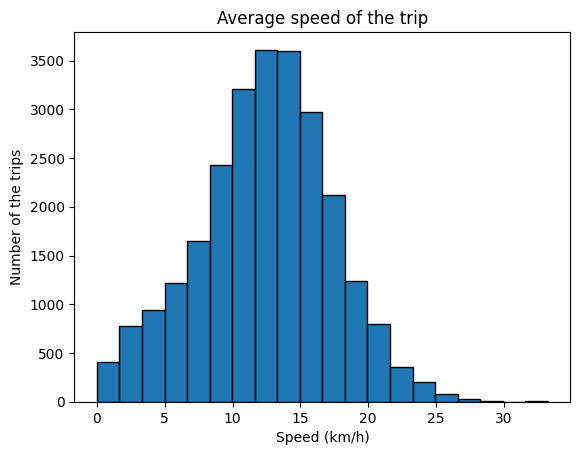

In [365]:
plt.hist(gdf['average speed'], bins=20, edgecolor='black')

plt.xlabel('Speed (km/h)')
plt.ylabel('Number of the trips')
plt.title('Average speed of the trip')

plt.show()

# Timely distributions

In [366]:
type(gdf.started_at[0])
date_string = gdf.started_at[0]
date_time_obj = datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S.%f%z')

print('Date:', date_time_obj.date())
print('Time:', date_time_obj.time())

Date: 2022-07-02
Time: 08:39:02.618000


In [367]:
gdf['date_time'] = pd.to_datetime(gdf['started_at'], format='%Y-%m-%d %H:%M:%S.%f%z')
gdf['date_time'] = pd.to_datetime(gdf.date_time).dt.tz_localize(None)
gdf['day_name'] = gdf['date_time'].dt.day_name()
gdf['date_column'] = gdf['date_time'].dt.strftime('%Y-%m-%d')
gdf['time_column'] = gdf['date_time'].dt.strftime('%H:%M:%S')
gdf['hour'] = gdf['date_time'].dt.strftime('%H')
gdf

,started_at,ended_at,duration,st_st_id,st_st_name,st_st_desc,st_st_lat,st_st_lon,en_st_id,en_st_name,...,waytypes_s,geometry,km,hour,average speed,date_time,day_name,date_column,time_column,type_of_day
0,2022-07-02 08:39:02.618000+00:00,2022-07-02 08:47:54.958000+00:00,532,408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977,448,Oslo Plaza,...,v:3.0 d:805.9 a:53.65;v:2.0 d:638.3 a:42.49;v:...,"LINESTRING (10.77395 59.91491, 10.77397 59.914...",1.5022,08,11.266500,2022-07-02 08:39:02.618,Saturday,2022-07-02,08:39:02,weekend
1,2022-07-02 08:39:04.505000+00:00,2022-07-02 08:48:36.381000+00:00,571,397,Storo Storsenter,langs Vitaminveien,59.946710,10.773805,421,Alexander Kiellands Plass,...,v:2.0 d:1435.3 a:53.14;v:3.0 d:805.4 a:29.82;v...,"LINESTRING (10.77378 59.94668, 10.77369 59.946...",2.7013,08,18.008667,2022-07-02 08:39:04.505,Saturday,2022-07-02,08:39:04,weekend
2,2022-07-02 08:39:22.379000+00:00,2022-07-02 08:55:10.095000+00:00,947,601,Rolf Wickstrøms vei,ved Bergrådveien,59.953411,10.757724,2309,Ulven Torg,...,v:6.0 d:2775.3 a:49.7;v:3.0 d:1226.1 a:21.96;v...,"LINESTRING (10.75776 59.95342, 10.75783 59.953...",5.5838,08,22.335200,2022-07-02 08:39:22.379,Saturday,2022-07-02,08:39:22,weekend
3,2022-07-02 08:40:20.905000+00:00,2022-07-02 09:03:56.044000+00:00,1415,464,Sukkerbiten,ved gangbroen,59.905124,10.753764,561,Kirkeveien,...,v:2.0 d:2641.3 a:59.61;v:3.0 d:841.5 a:18.99;v...,"LINESTRING (10.75380 59.90512, 10.75386 59.905...",4.4306,08,11.558087,2022-07-02 08:40:20.905,Saturday,2022-07-02,08:40:20,weekend
4,2022-07-02 08:40:45.470000+00:00,2022-07-02 08:50:08.635000+00:00,563,519,Thomas Heftyes plass,ved Bygdøy allé,59.918578,10.703900,473,Majorstuveien,...,v:1.0 d:657.1 a:46.61;v:2.0 d:427.4 a:30.32;v:...,"LINESTRING (10.70389 59.91857, 10.70347 59.918...",1.4098,08,9.398667,2022-07-02 08:40:45.470,Saturday,2022-07-02,08:40:45,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,2022-07-05 06:11:06.755000+00:00,2022-07-05 06:26:45.112000+00:00,938,624,Dælenenggata,ved Fagerheimgata,59.928750,10.767546,414,Kontraskjæret,...,v:2.0 d:2388.1 a:72.99;v:3.0 d:700.6 a:21.41;v...,"LINESTRING (10.76749 59.92877, 10.76752 59.928...",3.2720,06,13.088000,2022-07-05 06:11:06.755,Tuesday,2022-07-05,06:11:06,weekday
25628,2022-07-05 06:11:20.250000+00:00,2022-07-05 06:20:00.952000+00:00,520,450,Elisenberg,ved holdeplassen,59.919524,10.708840,609,Fred Olsens gate,...,v:2.0 d:2541.0 a:77.37;v:1.0 d:380.1 a:11.57;v...,"LINESTRING (10.70884 59.91953, 10.70894 59.919...",3.2844,06,24.633000,2022-07-05 06:11:20.250,Tuesday,2022-07-05,06:11:20,weekday
25629,2022-07-05 06:11:22.633000+00:00,2022-07-05 06:21:46.756000+00:00,624,453,Frogner Stadion,ved hovedinngangen,59.927538,10.710263,572,Skøyen,...,v:1.0 d:1897.6 a:75.26;v:6.0 d:501.1 a:19.87;v...,"LINESTRING (10.71025 59.92753, 10.71102 59.927...",2.5214,06,15.128400,2022-07-05 06:11:22.633,Tuesday,2022-07-05,06:11:22,weekday
25630,2022-07-05 06:11:38.707000+00:00,2022-07-05 06:20:05.391000+00:00,506,403,Parkveien,ved trikkestoppet,59.921768,10.730476,547,Skippergata,...,v:2.0 d:1404.2 a:71.82;v:1.0 d:460.6 a:23.56;v...,"LINESTRING (10.73048 59.92177, 10.73008 59.921...",1.9551,06,14.663250,2022-07-05 06:11:38.707,Tuesday,2022-07-05,06:11:38,weekday


## Date

In [368]:
type(gdf['time_column'])

pandas.core.series.Series

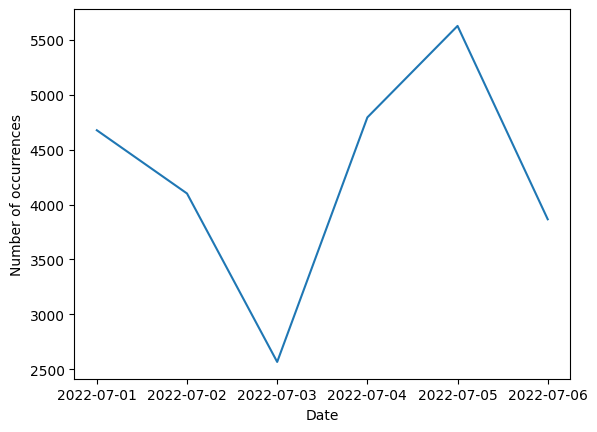

In [369]:
date_counts = gdf['date_column'].value_counts().sort_index()

plt.plot(date_counts.index, date_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of occurrences')
plt.show()

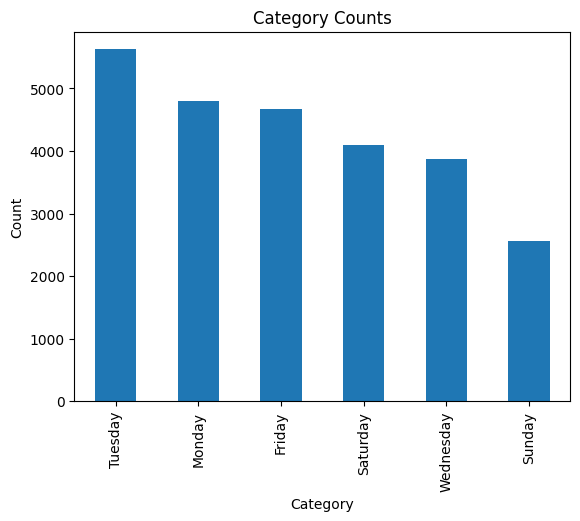

In [370]:
counts = gdf['day_name'].value_counts()
counts.plot(kind='bar')

# set the axis labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Counts')
plt.show()

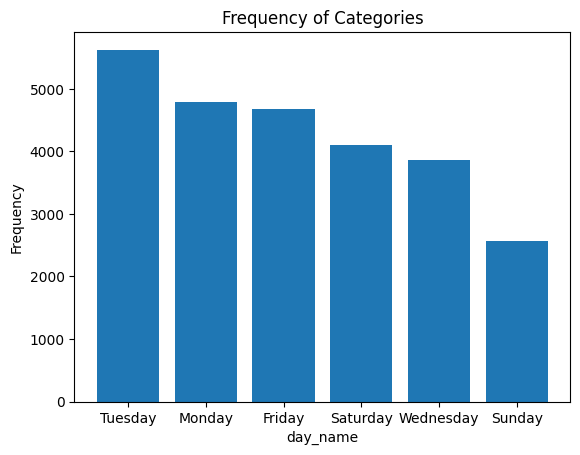

In [371]:
plt.bar(gdf['day_name'].value_counts().index, gdf['day_name'].value_counts().values)
plt.xlabel('day_name')
plt.ylabel('Frequency')
plt.title('Frequency of Categories')
plt.show()

In [372]:
grouped = gdf.groupby('hour')
count_values = grouped['hour'].count()

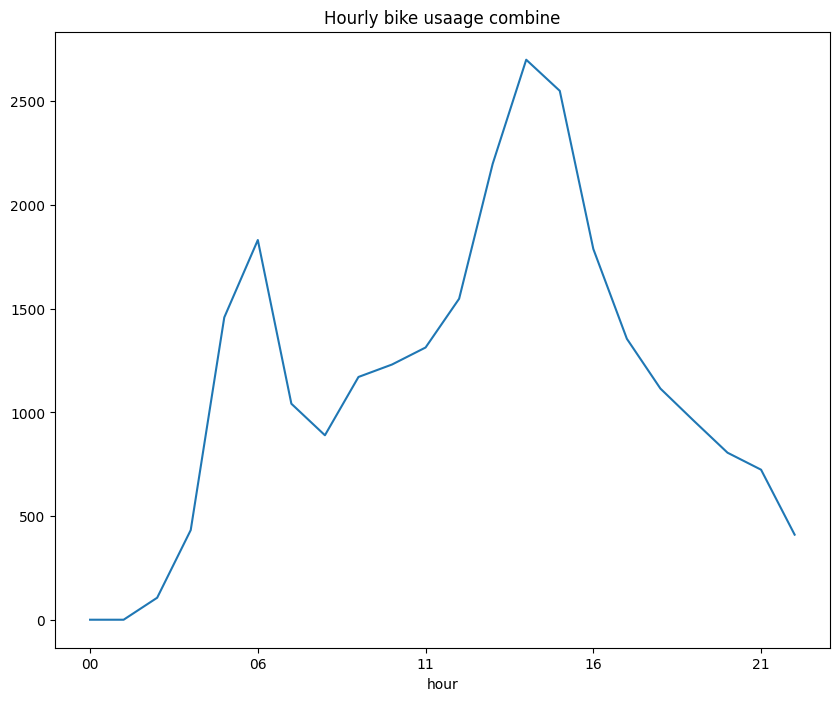

In [373]:
import numpy as np
count_values.plot(figsize=(10,8))
plt.title('Hourly bike usaage combine')
plt.show()

In [374]:
def weekend(val):
    if val == 'Saturday' or val == 'Sunday':
        return 'weekend'
    else:
        return 'weekday'
gdf['type_of_day'] = gdf['day_name'].apply(weekend)
gdf.head()

,started_at,ended_at,duration,st_st_id,st_st_name,st_st_desc,st_st_lat,st_st_lon,en_st_id,en_st_name,...,waytypes_s,geometry,km,hour,average speed,date_time,day_name,date_column,time_column,type_of_day
0,2022-07-02 08:39:02.618000+00:00,2022-07-02 08:47:54.958000+00:00,532,408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977,448,Oslo Plaza,...,v:3.0 d:805.9 a:53.65;v:2.0 d:638.3 a:42.49;v:...,"LINESTRING (10.77395 59.91491, 10.77397 59.914...",1.5022,08,11.266500,2022-07-02 08:39:02.618,Saturday,2022-07-02,08:39:02,weekend
1,2022-07-02 08:39:04.505000+00:00,2022-07-02 08:48:36.381000+00:00,571,397,Storo Storsenter,langs Vitaminveien,59.946710,10.773805,421,Alexander Kiellands Plass,...,v:2.0 d:1435.3 a:53.14;v:3.0 d:805.4 a:29.82;v...,"LINESTRING (10.77378 59.94668, 10.77369 59.946...",2.7013,08,18.008667,2022-07-02 08:39:04.505,Saturday,2022-07-02,08:39:04,weekend
2,2022-07-02 08:39:22.379000+00:00,2022-07-02 08:55:10.095000+00:00,947,601,Rolf Wickstrøms vei,ved Bergrådveien,59.953411,10.757724,2309,Ulven Torg,...,v:6.0 d:2775.3 a:49.7;v:3.0 d:1226.1 a:21.96;v...,"LINESTRING (10.75776 59.95342, 10.75783 59.953...",5.5838,08,22.335200,2022-07-02 08:39:22.379,Saturday,2022-07-02,08:39:22,weekend
3,2022-07-02 08:40:20.905000+00:00,2022-07-02 09:03:56.044000+00:00,1415,464,Sukkerbiten,ved gangbroen,59.905124,10.753764,561,Kirkeveien,...,v:2.0 d:2641.3 a:59.61;v:3.0 d:841.5 a:18.99;v...,"LINESTRING (10.75380 59.90512, 10.75386 59.905...",4.4306,08,11.558087,2022-07-02 08:40:20.905,Saturday,2022-07-02,08:40:20,weekend
4,2022-07-02 08:40:45.470000+00:00,2022-07-02 08:50:08.635000+00:00,563,519,Thomas Heftyes plass,ved Bygdøy allé,59.918578,10.703900,473,Majorstuveien,...,v:1.0 d:657.1 a:46.61;v:2.0 d:427.4 a:30.32;v:...,"LINESTRING (10.70389 59.91857, 10.70347 59.918...",1.4098,08,9.398667,2022-07-02 08:40:45.470,Saturday,2022-07-02,08:40:45,weekend


In [375]:
weekend_gdf = gdf[gdf['type_of_day'] == 'weekend']
weekday_gdf = gdf[gdf['type_of_day'] == 'weekday']

In [376]:
grouped = weekday_gdf.groupby('hour')
count_values = grouped['hour'].count()

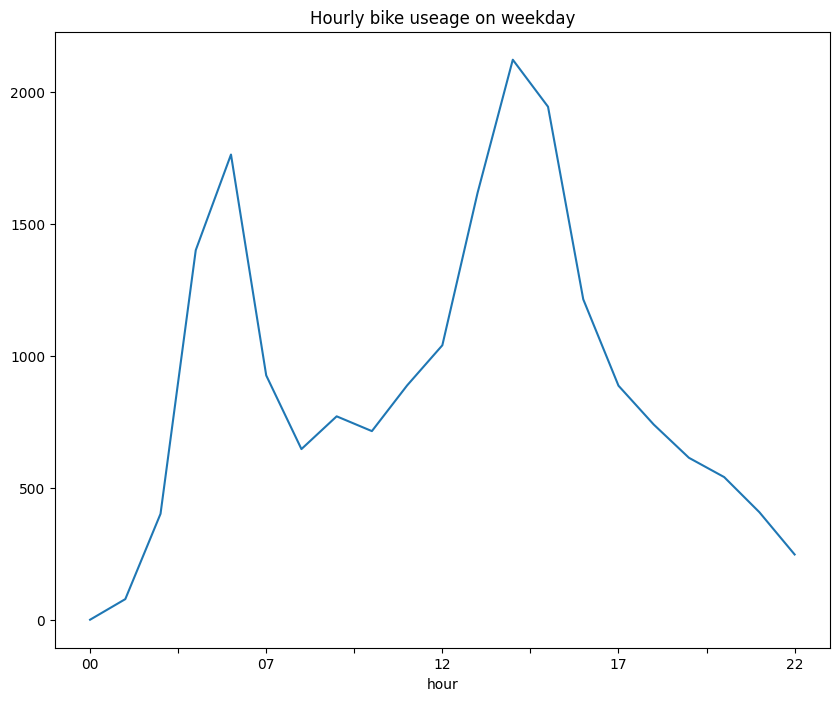

In [377]:
import numpy as np
count_values.plot(figsize=(10,8))
plt.title('Hourly bike useage on weekday')
plt.show()

In [378]:
grouped = weekend_gdf.groupby('hour')
count_values = grouped['hour'].count()

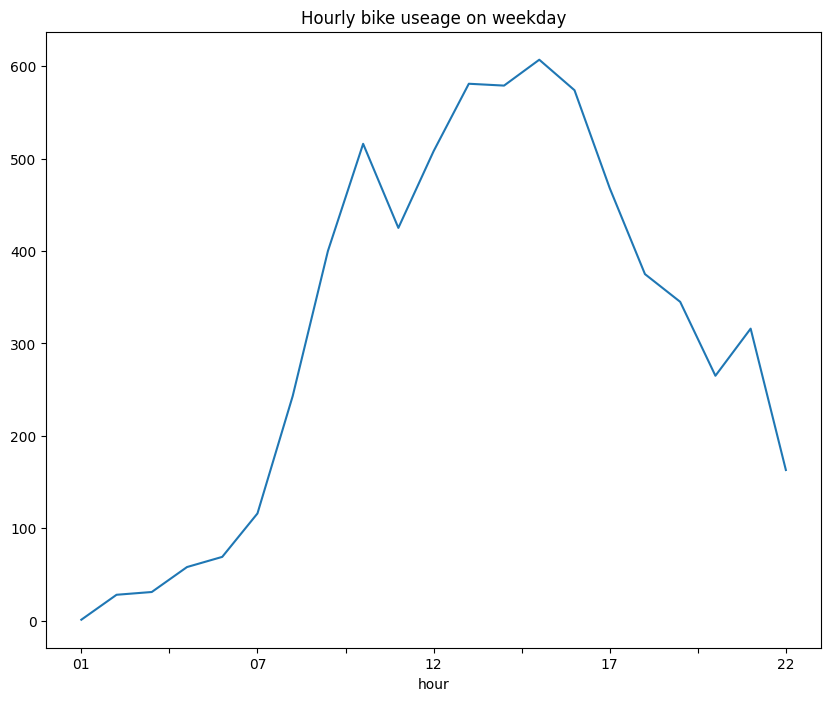

In [379]:
import numpy as np
count_values.plot(figsize=(10,8))
plt.title('Hourly bike useage on weekday')
plt.show()